<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/AirPollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Pollution Prediction**

# **1. Introduction**

Company Introduction
Your client for this project is an air purifier company.

One of the leading Global pollution controller organizations.
The company is working its way for the betterment of the society by using advanced technologies to purify the air by removing harmful particles from the atmosphere.

Current Scenario
As we know in recent years the pollution emitted per day has increased drastically, countries all around the world are taking up actions in order to tackle the rapid increase in pollution to avoid global warming.
Beijing’s pollution authority has collected data for the past 5 years and the data has been passed on to your client by the government of China.
The company calculates pollution using traditional or manual methods, so it needs a model to do the long 









# **2. Problem Statement**
**The current process suffers from the following problems:**

*   China is notorious for being a major polluter. Its economic growth in the past three decades has been the fastest among major nations, which is the main factor in why China has extensive air pollution.
*   China’s Environmental Sustainability Index is ranked near the bottom among countries worldwide.

Airifi has hired you as a data science consultant. They want you to come up with actionable insights and a model that could help predict pollution.
**Your Role**
*  You are given a dataset of the past few years of the air quality (2013-2017).
*  Your task is to build a regression model using the dataset.
*  Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler,OneHotEncoder
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,cross_validate,KFold
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.utils import shuffle
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import pickle


# **4. Data Acquisition & Description**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/beijing_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/beijing_test.csv")
dataValidationId=dataValidation.REF_NO
data.head(10)



,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
data.station.unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**

**Check null value or any other inconsistent value in column**

In [ ]:
(data==0).sum()

REF_NO          0
year            0
month           0
day             0
hour        16824
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP         2642
PRES            0
DEWP          828
RAIN       387119
wd              0
WSPM        10891
station         0
dtype: int64

In [ ]:
data.isna().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [ ]:
data[data["PM2.5"]!="NAN"]["PM10"]

0           4.0
1           8.0
2           7.0
3           6.0
4           3.0
          ...  
403771    487.0
403772    492.0
403773    498.0
403774    537.0
403775    490.0
Name: PM10, Length: 403776, dtype: float64

In [ ]:

colMatter=["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","wd","WSPM"]
data.duplicated(colMatter).value_counts()
# data1=data[colMatter]
# data1


False    403283
True        493
dtype: int64

In [ ]:
# duplicate = data1[data1.duplicated()==True]
# duplicate
# data1.duplicated().value_counts()

### **5.2 Data Cleaning**

In [ ]:
data.drop(data[data["PM2.5"].isna()==True].index,inplace=True)
data.drop(["wd","PM10"],axis=1,inplace=True)
smmImputer=SimpleImputer(strategy="constant",fill_value=0)
transformed_values=smmImputer.fit_transform(data[["TEMP","RAIN","DEWP","WSPM"]])
data[["TEMP","RAIN","DEWP","WSPM"]]=transformed_values
smmImputer=SimpleImputer(strategy="median")
transformed_values=smmImputer.fit_transform(data[["SO2","NO2","CO","O3","PRES"]])
data[["SO2","NO2","CO","O3","PRES"]]=transformed_values
data.isna().sum()

REF_NO     0
year       0
month      0
day        0
hour       0
PM2.5      0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
station    0
dtype: int64

In [ ]:
# dataImpute=data[["year","month","day","hour","PM2.5","SO2","NO2","CO","O3","PRES"]]
# knnImp=KNNImputer()
# transformed_values=knnImp.fit_transform(dataImpute)

# **6. Exploratory Data Analysis**

### **Detect Outliers and distribution of numerical features**

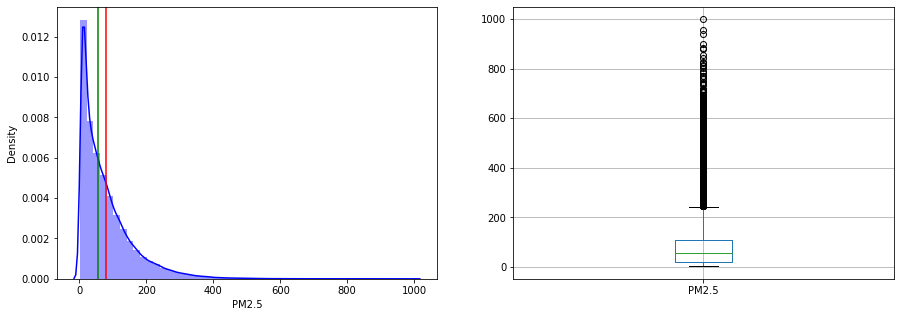

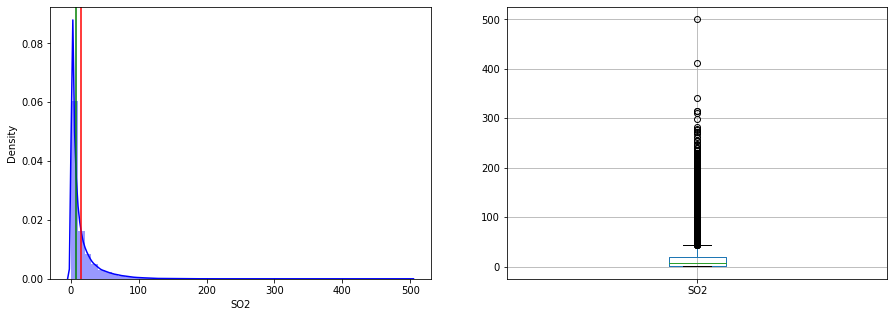

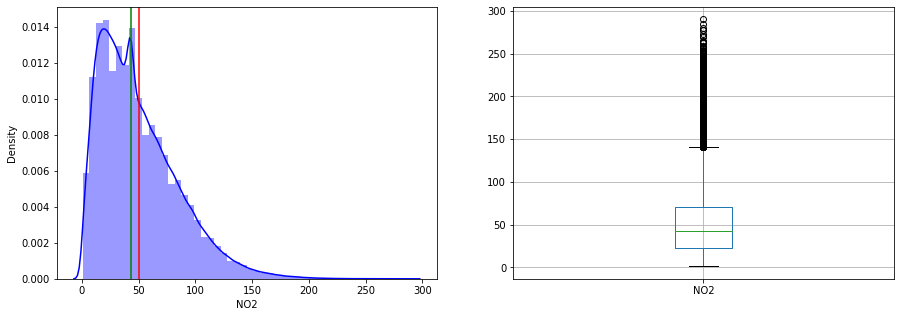

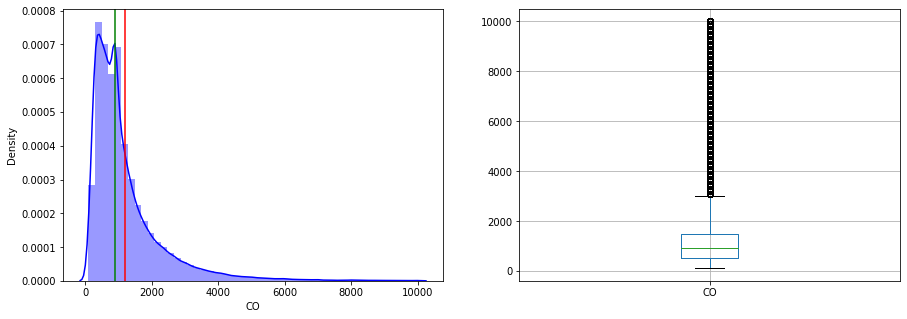

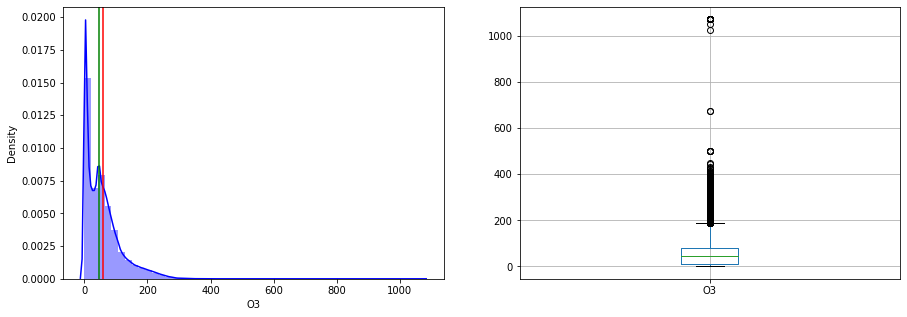

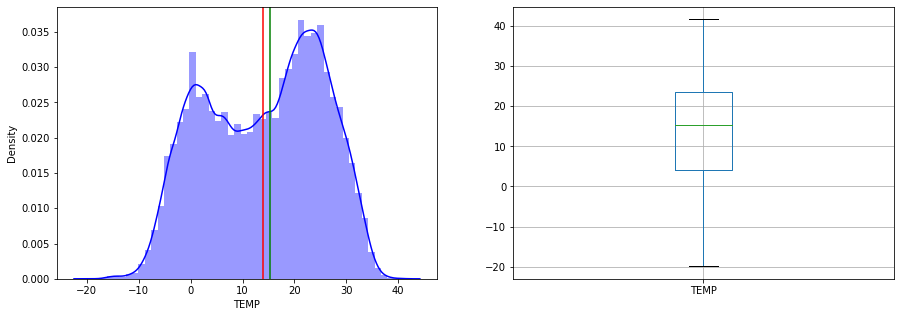

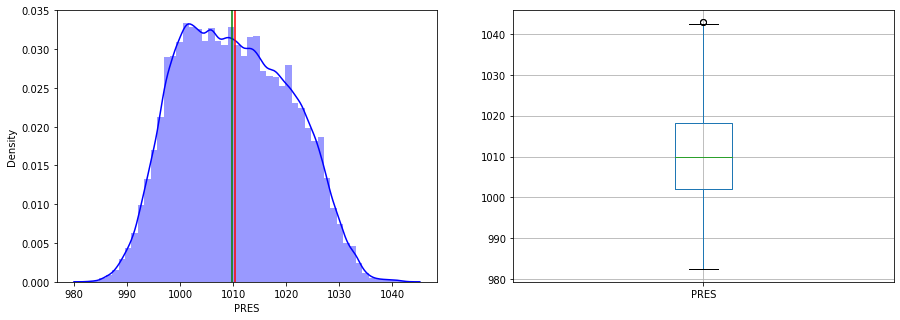

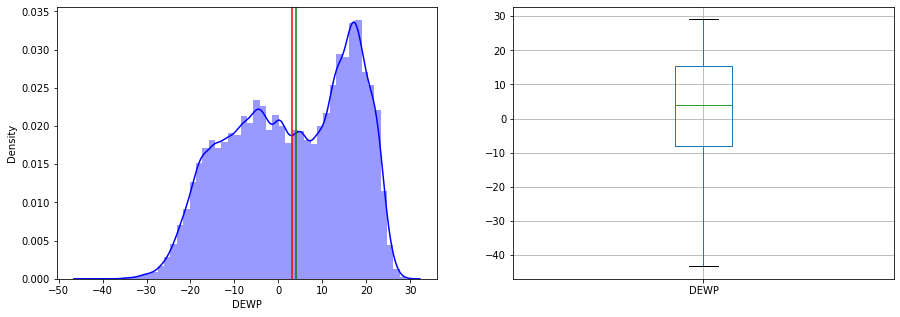

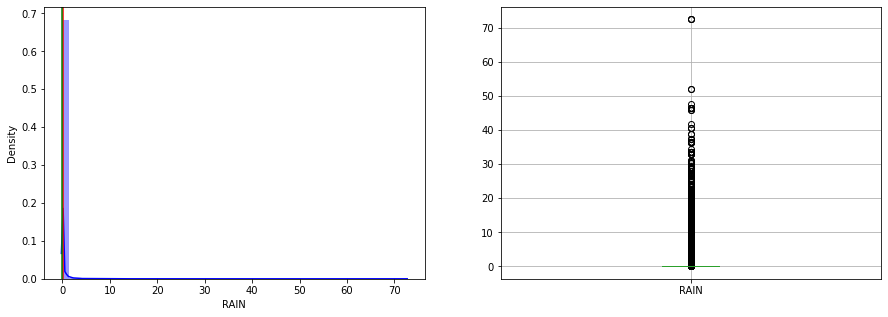

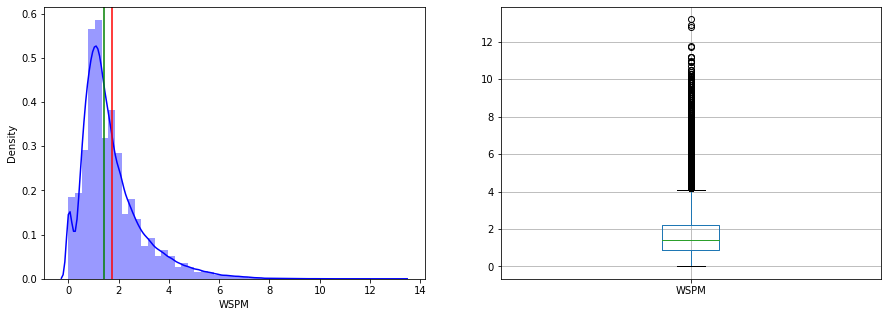

In [ ]:
Contcolumn=["PM2.5","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]
for col in Contcolumn:
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  data.boxplot(column=col)



### **Checking if relationship is linear between input features and target variable**

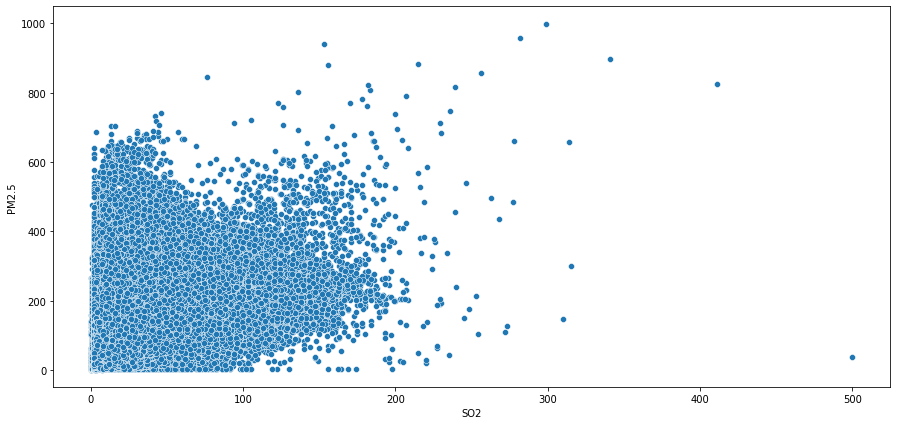

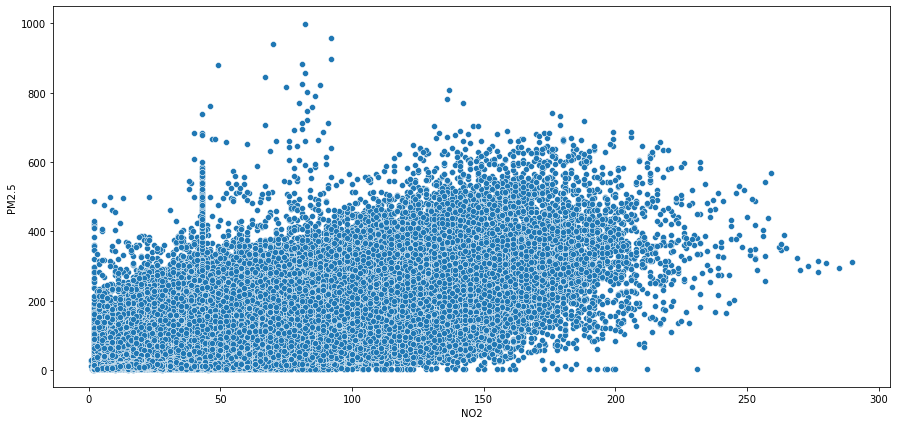

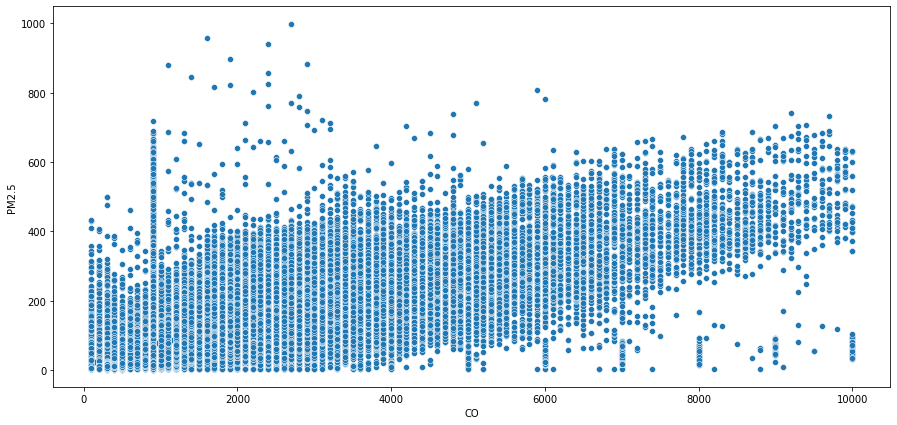

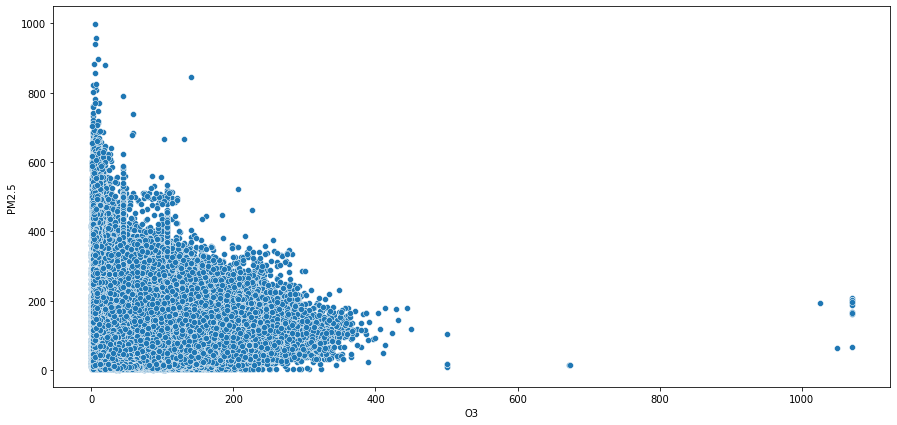

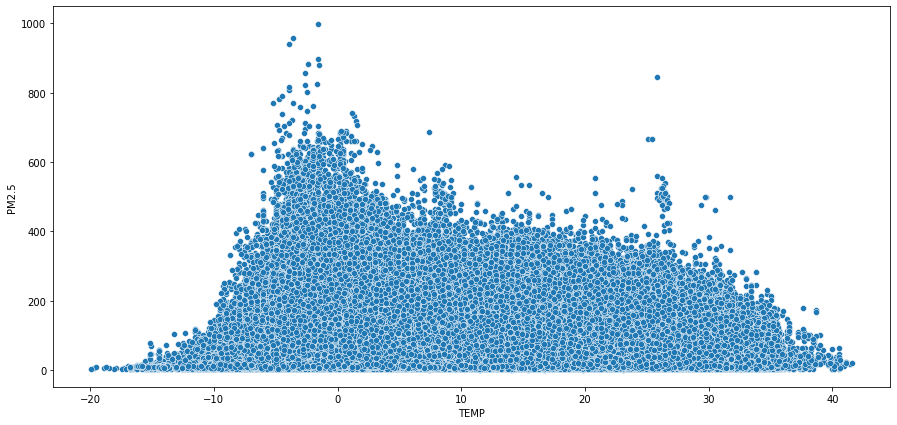

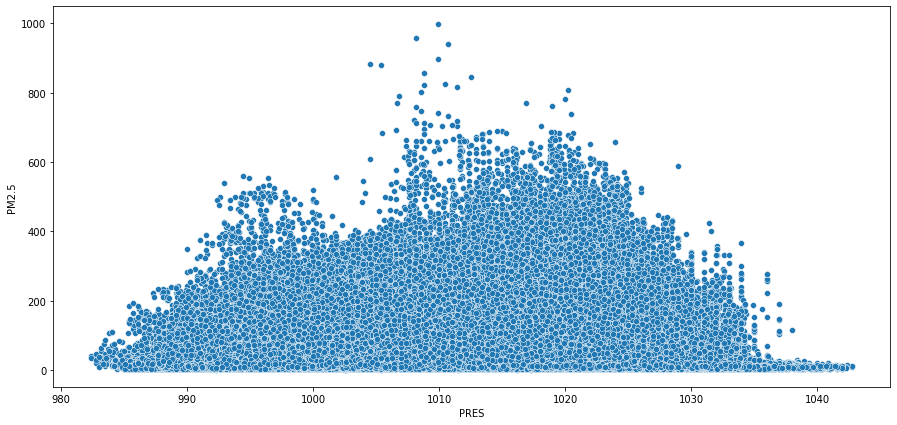

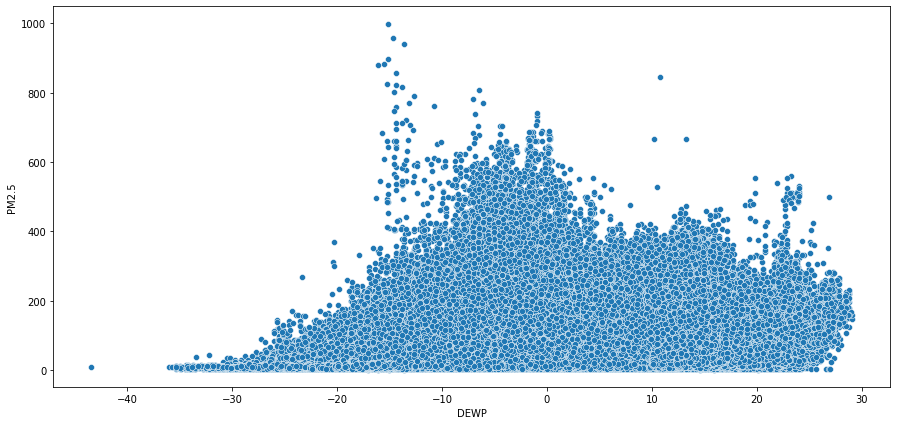

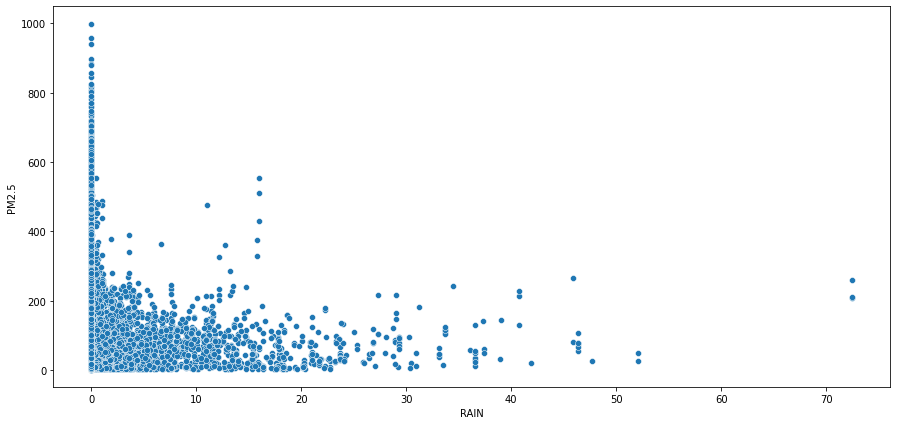

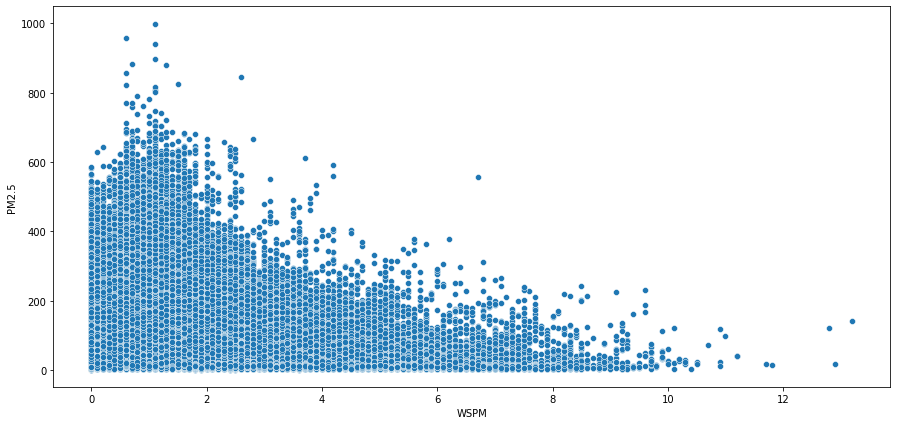

In [ ]:
xCol=["SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]
for col in xCol:
  fig=plt.figure(figsize=[15,7])
  sns.scatterplot(x=col, y="PM2.5",data=data)


### **Which year has higest pollution level**

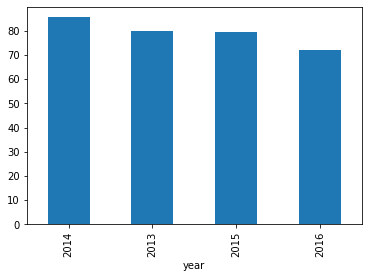

In [ ]:
# sns.countplot(x="PM2.5",hue="year", data=data)
(data.groupby("year")["PM2.5"].mean().sort_values(ascending=False)).plot.bar()

### **Which month has higest pollution level**

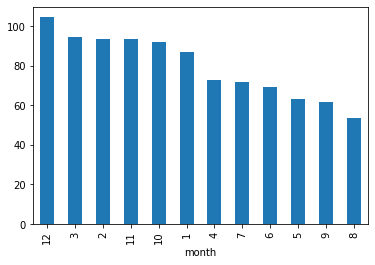

In [ ]:
# sns.countplot(x="PM2.5",hue="year", data=data)
(data.groupby("month")["PM2.5"].mean().sort_values(ascending=False)).plot.bar()

### **Which station had the lowest pollution level?**

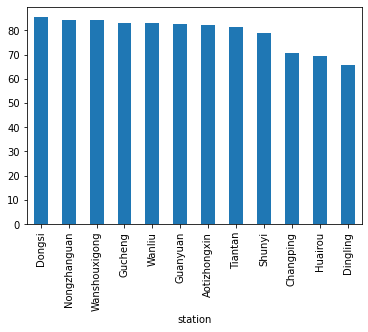

In [ ]:
(data.groupby("station")["PM2.5"].mean().sort_values(ascending=False)).plot.bar()

## **Check Multicolinearity**

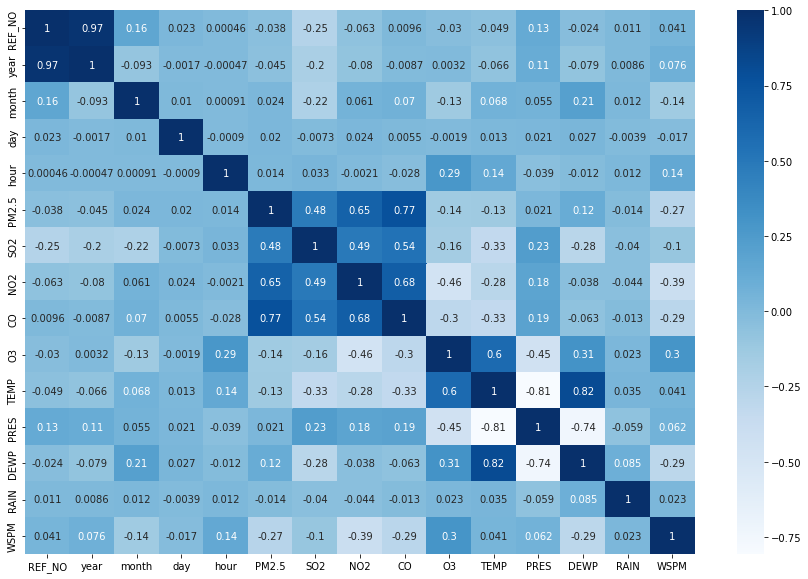

In [ ]:
figure=plt.figure(figsize=[15,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor="white")


# **7. Data Post-Processing**

### **7.1 Data Preparation**

In [ ]:
features=["SO2","NO2","CO","O3","TEMP","PRES","RAIN","WSPM"]
X=data[features]
y=data["PM2.5"]
dataValidation=dataValidation[features]
X.head()


,SO2,NO2,CO,O3,TEMP,PRES,RAIN,WSPM
0,4.0,7.0,300.0,77.0,-0.7,1023.0,0.0,4.4
1,4.0,7.0,300.0,77.0,-1.1,1023.2,0.0,4.7
2,5.0,10.0,300.0,73.0,-1.1,1023.5,0.0,5.6
3,11.0,11.0,300.0,72.0,-1.4,1024.5,0.0,3.1
4,12.0,12.0,300.0,72.0,-2.0,1025.2,0.0,2.0


# **8. Model Development & Evaluation**
## **(Random Forest - Hypertuning- RandomSearchCV)**

In [ ]:
pipeRF=make_pipeline(RandomForestRegressor(random_state=50))
kf=KFold(8,shuffle=True,random_state=1)
# param_list={
#             "randomforestregressor__criterion" : ["squared_error", "absolute_error", "poisson"],
#             "randomforestregressor__max_depth" : [None,2,3,4,5,6],
#            "randomforestregressor__min_samples_leaf":[1,2,3,4,5],
#           #  "min_samples_split" :[2,3,4,5],
#            "randomforestregressor__min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6],
#            "randomforestregressor__max_features":["auto","log2","sqrt",None],
#              "randomforestregressor__n_estimators": [100],
#            "randomforestregressor__max_leaf_nodes":[None,10,20,30,40,50]
#             }


# modelRFRandomCV=RandomizedSearchCV(pipeRF,param_list,cv=kf,n_jobs=-1,
#                                    n_iter=150, random_state=30,return_train_score=True)
cv_score=cross_validate(pipeRF,X,y,cv=kf,n_jobs=-1,scoring=("neg_root_mean_squared_error","r2"),return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
print(cv_score_df)
print(cv_score_df.mean())
pipeRF.fit(X,y)



     fit_time  score_time  test_neg_root_mean_squared_error  \
0  317.276624    4.247680                        -33.327544   
1  317.503036    4.246720                        -33.390072   
2  309.066924    3.718110                        -33.545288   
3  309.400420    3.804192                        -33.784785   
4  312.603094    4.278867                        -33.466092   
5  310.331594    4.182869                        -33.730978   
6  309.062589    3.988857                        -33.503855   
7  311.663815    4.120356                        -33.459830   

   train_neg_root_mean_squared_error   test_r2  train_r2  
0                         -12.574824  0.822195  0.974767  
1                         -12.590454  0.820287  0.974729  
2                         -12.567987  0.821973  0.974752  
3                         -12.583922  0.819175  0.974693  
4                         -12.534110  0.820069  0.974943  
5                         -12.562146  0.818344  0.974808  
6                  

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=50))])

# **9. Dump Model using Pickle**

In [ ]:
##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/AirPoll_estimator.pkl", 'wb') as f_out:
    pickle.dump(pipeRF, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/AirPoll_estimator.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

# testData=dataValidation.head(1)
# print(testData)
# print(type(testData))
# dataValidation_pred=model.predict(testData)
# print(dataValidation_pred)

testData=dataValidation
dataValidation_pred=model.predict(testData)
submission = pd.DataFrame({'id':dataValidationId,'satisfaction':dataValidation_pred})
submission.satisfaction=submission.satisfaction.replace([0,1],["neutral or dissatisfied","satisfied"])
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
testData

,SO2,NO2,CO,O3,TEMP,PRES,RAIN,WSPM
0,8.0,121.0,6100.0,4.0,-4.7,1022.1,0.0,1.0
1,7.0,113.0,6300.0,4.0,-5.2,1022.3,0.0,0.7
2,7.0,111.0,6200.0,4.0,-5.4,1022.5,0.0,1.1
3,6.0,109.0,5900.0,3.0,-5.2,1022.5,0.0,1.1
4,10.0,123.0,7700.0,16.0,-5.0,1021.9,0.0,1.0
...,...,...,...,...,...,...,...,...
16723,3.0,24.0,400.0,72.0,12.5,1013.5,0.0,2.4
16724,3.0,41.0,500.0,50.0,11.6,1013.6,0.0,0.9
16725,4.0,38.0,500.0,54.0,10.8,1014.2,0.0,1.1
16726,4.0,30.0,400.0,59.0,10.5,1014.4,0.0,1.2
